In [ ]:
# Домашнее задание №1

In [246]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [247]:
# загружаю данные с локального кампьютера
# как загрузить SSL на свой Mac OS для выхода в интернет так и не разобрался)

data = pd.read_csv('adult.csv')

In [248]:
# смотрим, что тут есть
print (data.shape)
data.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [250]:
# на первый взгляд пропусков нет
# попробуем посмотреть на это по-другому
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [233]:
# и так
data.describe(include = "all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [251]:
# проверим на собственно пропуски данных
print (data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [252]:
# пропусков у нас нет, но есть знаки вопроса
# найдем все строки где стоит знак вопроса

data_1 = data[data.eq("?").any(axis=1)]
print (data_1.shape)
data_1

(3620, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [253]:
# удалим все строки строки со знаком вопроса
# заменим '?' на NaN
# как удалить сразу я не догадался
mask = (data == '?')
data = data[~mask]
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [254]:
# удалим строки с NaN
data = data.dropna()
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [255]:
data.shape

(45222, 15)

In [ ]:
# посмотрим какие из параметров больще влияют на целевой показатель

In [ ]:
#1 age

In [256]:
crosstb = pd.crosstab(data['age'],data['income'])
crosstb

income,<=50K,>50K
age,,
17,493,0
18,695,0
19,862,2
20,915,1
21,929,6
...,...,...
86,1,0
87,1,0
88,4,1


<Axes: xlabel='age', ylabel='число людей c данным показателем'>

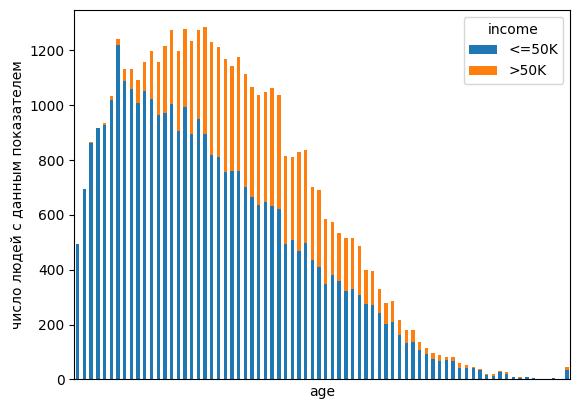

In [242]:
# как отложить на оси Х значения в читаемом виде тоже не разобрался
crosstb.plot(kind="bar", stacked=True, rot=0, 
             xlabel='age', ylabel='число людей c данным показателем',
             xticks=()
            )

In [ ]:
#2 educational-num

In [257]:
crosstb = pd.crosstab(data['educational-num'],data['income'])
crosstb

income,<=50K,>50K
educational-num,,
1,71,1
2,214,8
3,427,22
4,768,55
5,638,38
6,1141,82
7,1530,89
8,534,43
9,12367,2416


<Axes: xlabel='educational-num', ylabel='число людей c данным показателем'>

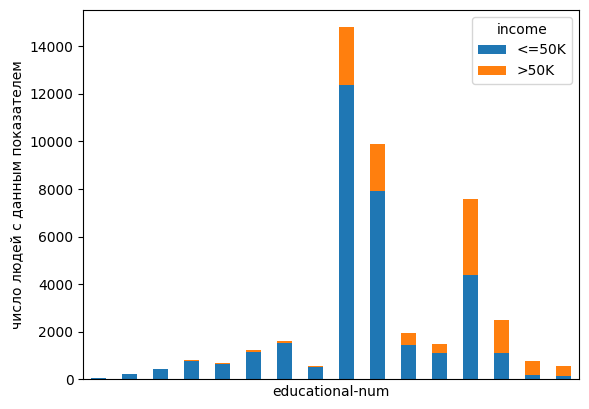

In [139]:
crosstb.plot(kind="bar", stacked=True, rot=0, 
             xlabel='educational-num', ylabel='число людей c данным показателем',
             xticks=()
            )

In [245]:
#3 capital-gain

In [140]:
crosstb = pd.crosstab(data['capital-gain'],data['income'])
crosstb

income,<=50K,>50K
capital-gain,,
0,32599,8833
114,8,0
401,2,0
594,42,0
914,10,0
...,...,...
25236,0,14
27828,0,56
34095,4,0


<Axes: xlabel='capital-gain', ylabel='число людей c данным показателем'>

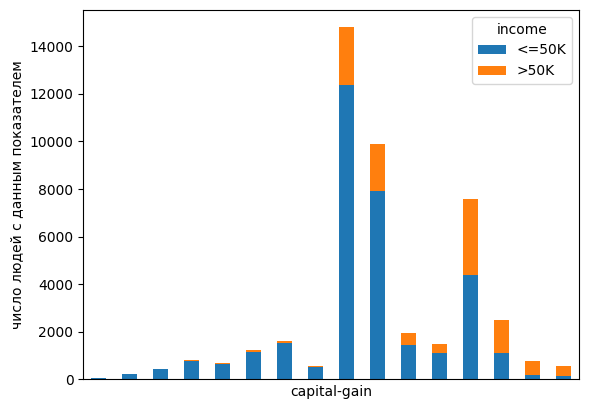

In [258]:
crosstb.plot(kind="bar", stacked=True, rot=0, 
             xlabel='capital-gain', ylabel='число людей c данным показателем',
             xticks=()
            )

In [ ]:
#4 hours-per-week

In [259]:
crosstb = pd.crosstab(data['hours-per-week'],data['income'])
crosstb

income,<=50K,>50K
hours-per-week,,
1,10,2
2,21,3
3,33,2
4,42,5
5,52,8
...,...,...
95,1,1
96,8,1
97,1,1


In [260]:
crosstb = pd.crosstab(data['hours-per-week'],data['income'])
crosstb

income,<=50K,>50K
hours-per-week,,
1,10,2
2,21,3
3,33,2
4,42,5
5,52,8
...,...,...
95,1,1
96,8,1
97,1,1


<Axes: xlabel='hours-per-week', ylabel='число людей c данным показателем'>

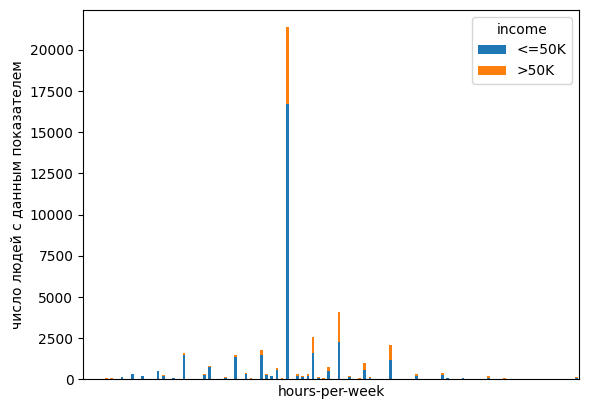

In [142]:
crosstb.plot(kind="bar", stacked=True, rot=0, 
             xlabel='hours-per-week', ylabel='число людей c данным показателем',
             xticks=()
            )

In [ ]:
#5 native-country

In [261]:
crosstb = pd.crosstab(data['native-country'],data['income'])
crosstb

income,<=50K,>50K
native-country,,
Cambodia,17,9
Canada,103,60
China,77,36
Columbia,78,4
Cuba,99,34
Dominican-Republic,92,5
Ecuador,37,6
El-Salvador,136,11
England,72,47


In [ ]:
# похоже это самый важный показхатель!
# в разных страхах соотношение очень разные

<Axes: xlabel='native-country', ylabel='число людей c данным показателем'>

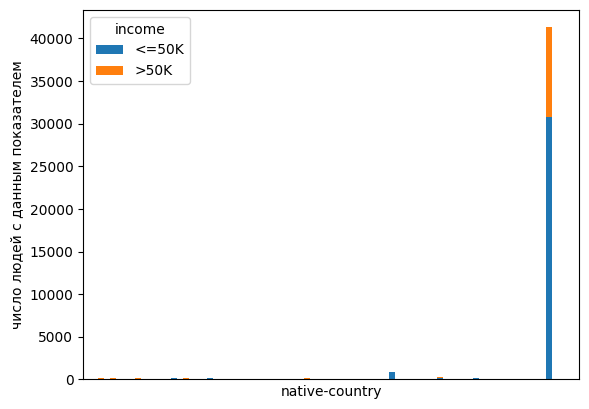

In [262]:
crosstb.plot(kind="bar", stacked=True, rot=0, 
             xlabel='native-country', ylabel='число людей c данным показателем',
             xticks=()
            )

In [ ]:
#5 fnlwgt - посмотрим на этот очень не понятный показатель

In [263]:
crosstb = pd.crosstab(data['fnlwgt'],data['income'])
crosstb

income,<=50K,>50K
fnlwgt,,
13492,1,0
13769,2,1
14878,0,1
18827,1,0
19214,1,0
...,...,...
1268339,1,0
1366120,1,0
1455435,1,0


In [ ]:
# пусть будет)

In [ ]:
#6 gender про это тоже не забудем)

In [264]:
crosstb = pd.crosstab(data['gender'],data['income'])
crosstb

income,<=50K,>50K
gender,,
Female,13026,1669
Male,20988,9539


In [ ]:
# мужчины оказывается почти в 4 раза чаще бывают богаче

In [265]:
#7 race

In [266]:
crosstb = pd.crosstab(data['race'],data['income'])
crosstb

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,382,53
Asian-Pac-Islander,934,369
Black,3694,534
Other,308,45
White,28696,10207


In [ ]:
#8 и тут явная не справедливость

In [ ]:
# для дальнейшего исследования рассмотрит все признаки

In [ ]:
# категоральные переменные
"""
1 'education',
2 'marital-status',
3 'occupation',
4 'relationship',
5 'race'
6 'workclass'
7 'native-country'
"""
# числовые
"""
1 'age',
2 'fnlwgt',
3 'educational-num',
4 'capital-gain',
5 'capital-loss',
6 'hours-per-week',
 """
# плюс признак 'gender'
# 'income' - целевой пригнак
# итого 15

In [267]:
# построим самую общую модель
# для удобства поменяем столбцы местами
selectedColumns = data[['income', 'gender',
                        'education', 'marital-status', 'occupation', 'relationship',
                        'race', 'workclass', 'native-country',
                        'age', 'fnlwgt', 'educational-num', 'capital-gain',
                        'capital-loss','hours-per-week']
                      ]

In [268]:
# посмотрим на какой-нибудь признак
selectedColumns['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [269]:
selectedColumns.head()

,income,gender,education,marital-status,occupation,relationship,race,workclass,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,<=50K,Male,11th,Never-married,Machine-op-inspct,Own-child,Black,Private,United-States,25,226802,7,0,0,40
1,<=50K,Male,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Private,United-States,38,89814,9,0,0,50
2,>50K,Male,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Local-gov,United-States,28,336951,12,0,0,40
3,>50K,Male,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Private,United-States,44,160323,10,7688,0,40
5,<=50K,Male,10th,Never-married,Other-service,Not-in-family,White,Private,United-States,34,198693,6,0,0,30


In [270]:
# столбец income является целевой переменной, удаляем его из Х
del selectedColumns['income']

In [271]:
selectedColumns.head()

,gender,education,marital-status,occupation,relationship,race,workclass,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,Male,11th,Never-married,Machine-op-inspct,Own-child,Black,Private,United-States,25,226802,7,0,0,40
1,Male,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Private,United-States,38,89814,9,0,0,50
2,Male,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Local-gov,United-States,28,336951,12,0,0,40
3,Male,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Private,United-States,44,160323,10,7688,0,40
5,Male,10th,Never-married,Other-service,Not-in-family,White,Private,United-States,34,198693,6,0,0,30


In [272]:
# Заменим
# Male - 1
# Female - 0
selectedColumns = selectedColumns.replace(to_replace=['Male', 'Female'], value=[1, 0])

In [274]:
selectedColumns.head(10)

,gender,education,marital-status,occupation,relationship,race,workclass,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,1,11th,Never-married,Machine-op-inspct,Own-child,Black,Private,United-States,25,226802,7,0,0,40
1,1,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Private,United-States,38,89814,9,0,0,50
2,1,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Local-gov,United-States,28,336951,12,0,0,40
3,1,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Private,United-States,44,160323,10,7688,0,40
5,1,10th,Never-married,Other-service,Not-in-family,White,Private,United-States,34,198693,6,0,0,30
7,1,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Self-emp-not-inc,United-States,63,104626,15,3103,0,32
8,0,Some-college,Never-married,Other-service,Unmarried,White,Private,United-States,24,369667,10,0,0,40
9,1,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Private,United-States,55,104996,4,0,0,10
10,1,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Private,United-States,65,184454,9,6418,0,40
11,1,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Federal-gov,United-States,36,212465,13,0,0,40


In [207]:
# ШАГ 1 параметр - education
# __________________________
# возьмем один из категориальных признаков, например, education
# все числовые признаки оставим
selectedColumns_1 = selectedColumns[['gender',
                        'education',
                        'age', 'fnlwgt', 'educational-num', 'capital-gain',
                        'capital-loss','hours-per-week']
                        ]
# ШАГ 2 возьмем все параметры
# __________________________
selectedColumns_2 = selectedColumns[['gender',
                        'education', 'marital-status', 'occupation', 'relationship',
                        'race', 'workclass', 'native-country',
                        'age', 'fnlwgt', 'educational-num', 'capital-gain',
                        'capital-loss','hours-per-week']
                        ]

In [275]:
selectedColumns_1.head()

,gender,education,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,1,11th,25,226802,7,0,0,40
1,1,HS-grad,38,89814,9,0,0,50
2,1,Assoc-acdm,28,336951,12,0,0,40
3,1,Some-college,44,160323,10,7688,0,40
5,1,10th,34,198693,6,0,0,30


In [276]:
selectedColumns_2.head()

,gender,education,marital-status,occupation,relationship,race,workclass,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,1,11th,Never-married,Machine-op-inspct,Own-child,Black,Private,United-States,25,226802,7,0,0,40
1,1,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Private,United-States,38,89814,9,0,0,50
2,1,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Local-gov,United-States,28,336951,12,0,0,40
3,1,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Private,United-States,44,160323,10,7688,0,40
5,1,10th,Never-married,Other-service,Not-in-family,White,Private,United-States,34,198693,6,0,0,30


In [277]:
# для значения education
# переведем в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns_1, columns=['education'])

In [222]:
X.head()

,gender,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,1,25,226802,7,0,0,40,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,38,89814,9,0,0,50,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,28,336951,12,0,0,40,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,44,160323,10,7688,0,40,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,1,34,198693,6,0,0,30,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [278]:
# воспользуемся примером из лекции
# заменим так же в целевой переменной income
# <=50K - 0
# >50K - 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [279]:
le.fit(data['income'])

LabelEncoder()

In [280]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [281]:
le.transform(['<=50K', '<=50K', '>50K']) # пример расшифровки

array([0, 0, 1])

In [282]:
le.inverse_transform([1, 0, 1])

array(['>50K', '<=50K', '>50K'], dtype=object)

In [283]:
# записываем в таргетную переменную y преобразованный столбец income
y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
# Строим логистическую регрессию - угадываем доход по признакам

In [284]:
# используем пример из лекции
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [285]:
# Поделим данные на обучающую выборку и тестовую. 
# Указываем в test_size долю датасета, которая пойдет на тестовую выбору - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [288]:
predictions[:15] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [289]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [290]:
model.predict_proba(X_test)

array([[0.99307172, 0.00692828],
       [0.83462273, 0.16537727],
       [0.66844013, 0.33155987],
       ...,
       [0.86790113, 0.13209887],
       [0.56499772, 0.43500228],
       [0.95631808, 0.04368192]])

In [ ]:
# Получаем наш скор (точность предсказания) на обучающей и тестовой выборках

In [291]:
model.score(X_train, y_train)

0.8165685380213948

In [292]:
model.score(X_test,y_test)

0.8213377556661139

In [293]:
# ШАГ 2 все параметры
X = pd.get_dummies(selectedColumns_2, columns=['education', 'marital-status', 
                                               'occupation', 'relationship',
                                               'race', 'workclass', 'native-country',
                                              ]) 

In [294]:
X.head()

,gender,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,1,25,226802,7,0,0,40,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,1,38,89814,9,0,0,50,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,28,336951,12,0,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,44,160323,10,7688,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,1,34,198693,6,0,0,30,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [297]:
model.score(X_train, y_train)

0.8485778256903558

In [298]:
model.score(X_test,y_test)

0.8509673852957435

In [ ]:
# ВЫВОД: если я ни в чем не ошибся то с учетом всех параметров получается немного точнее

In [ ]:
# Метод опорных векторов. SVM
# ___________________________

In [ ]:
# код из лекции

In [299]:
# ШАГ 1 параметр - education
# __________________________
# возьмем один из категориальных признаков, например, education
# все числовые признаки оставим
selectedColumns_1 = selectedColumns[['gender',
                        'education',
                        'age', 'fnlwgt', 'educational-num', 'capital-gain',
                        'capital-loss','hours-per-week']
                        ]
# ШАГ 2 возьмем все параметры
# __________________________
selectedColumns_2 = selectedColumns[['gender',
                        'education', 'marital-status', 'occupation', 'relationship',
                        'race', 'workclass', 'native-country',
                        'age', 'fnlwgt', 'educational-num', 'capital-gain',
                        'capital-loss','hours-per-week']
                        ]

In [303]:
X = pd.get_dummies(selectedColumns_1, columns=['education'])

In [304]:
X.head()

,gender,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,1,25,226802,7,0,0,40,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,38,89814,9,0,0,50,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,28,336951,12,0,0,40,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,44,160323,10,7688,0,40,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,1,34,198693,6,0,0,30,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
# получаем наш скор, для обучающей и тестовой выборок
# для текущего Х - ШАГ 1

In [309]:
clf.score(X_train, y_train) 

0.8254415789037234

In [310]:
clf.score(X_test, y_test)

0.8301824212271973

In [ ]:
# Без StandardScaler

In [311]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [312]:
svc.score(X_train, y_train)

0.7897559222710562

In [313]:
svc.score(X_test, y_test)

0.7948037589828635

In [ ]:
Без StandardScaler точность хуже

In [314]:
# ШАГ 2 все параметры
X = pd.get_dummies(selectedColumns_2, columns=['education', 'marital-status', 
                                               'occupation', 'relationship',
                                               'race', 'workclass', 'native-country',
                                              ]) 

In [315]:
X.head()

,gender,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,1,25,226802,7,0,0,40,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,1,38,89814,9,0,0,50,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,28,336951,12,0,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,44,160323,10,7688,0,40,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,1,34,198693,6,0,0,30,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [324]:
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [325]:
svc.score(X_train, y_train)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- marital-status_Divorced
- marital-status_Married-AF-spouse
- marital-status_Married-civ-spouse
- marital-status_Married-spouse-absent
- marital-status_Never-married
- ...
